<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Data Crunching & Machine Learning</div>

0. [Modules](#sec0) 
1. [Data Loading](#sec1)
2. [Extraction of Data](#sec2)
3. [Additional work (exploration)](#sec3)

# 0. <a id="sec0"></a> Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math

# 1. <a id="sec1"></a> Data Loading & Cleansing

## Data Loading

In [2]:
df_tickets_data = pd.read_csv("data/ticket_data.csv")
df_stations = pd.read_csv("data/stations.csv")
df_providers = pd.read_csv("data/providers.csv")
df_cities = pd.read_csv("data/cities.csv")

In [3]:
print(f"The table contains {len(df_tickets_data)} rows.")
print(f"The table contains {len(df_tickets_data.dropna())} rows without NA.")
df_tickets_data.head()

The table contains 74168 rows.
The table contains 32727 rows without NA.


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [4]:
print(f"The table contains {len(df_cities)} rows.")
print(f"The table contains {len(df_cities.dropna())} rows without NA!")
df_cities.head()

The table contains 8040 rows.
The table contains 369 rows without NA!


,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [5]:
print(f"The table contains {len(df_stations)} rows.")
print(f"The table contains {len(df_stations.dropna())} rows without NA.")
df_stations.head()

The table contains 11035 rows.
The table contains 11035 rows without NA.


,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [6]:
print(f"The table contains {len(df_providers)} rows.")
print(f"The table contains {len(df_providers.dropna())} rows without NA.")
df_providers.head()

The table contains 227 rows.
The table contains 213 rows without NA.


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


The dataset `ticket_data.csv` contains all the history of tickets proposed by Tictatrip.
<br>The dataset `cities.csv` enumerates for each trip the destination city and its position.
<br>The dataset `stations.csv` enumerates all the stations where there are stops.
<br>The dataset `providers.csv` provides information about the different providers referenced on the trips proposed by Tictatrip.

We observe that these datasets may contain quite a lot NaN values.

## Data Cleansing & Expanding

Before going further, it is important to identify some issues in the datasets but also to expand it by adding useful columns for the upcoming analysis.

The NaN values in the column "o_station" and "d_station" in the dataframe `ticket_data.csv` cause the *ids* to be float numbers instead of integers.

Let us express the times in Datetime type.
<br>The initial values of `departure_ts` and other dates are of types *str* and have the following format: 'YYYY-MM-DD hh:mm:ss+00'
<br>And we want the following string format: 'YYYY-MM-DD hh:mm:ss'
<br>The second will be enough in terms of duration precision!

In [7]:
def correct_string_date_format(date_string):
    return date_string[:19]
date_string = '2017-10-13 13:27:00+00'
correct_string_date_format(date_string)

'2017-10-13 13:27:00'

In [8]:
## we apply this function to any columns representing a time in our datasets
df_tickets_data["departure_datetime"] = pd.to_datetime(df_tickets_data['departure_ts'].apply(correct_string_date_format))
df_tickets_data["arrival_datetime"] = pd.to_datetime(df_tickets_data['arrival_ts'].apply(correct_string_date_format))
df_tickets_data["duration_datetime"] = df_tickets_data["arrival_datetime"] - df_tickets_data["departure_datetime"]
df_tickets_data["search_datetime"] = pd.to_datetime(df_tickets_data['search_ts'].apply(correct_string_date_format))

# Eventually since these 3 columns are not used as keys to join 
# other tables/datasets, we can remove them:
df_tickets_data = df_tickets_data.drop(columns=['departure_ts', 'arrival_ts', 'search_ts'])

In [9]:
# Add a column for prices in € ; It will more adapted to display the prices afterwards
df_tickets_data["price_in_euros"] = df_tickets_data["price_in_cents"]/100

# 2. <a id="sec2"></a> Extraction of Data

<div class="alert alert-warning">
    
**Exercice: Extraction of relevant information** <br>
- Minimimum, maximum and average prices & duration per trip
- Difference of the average price & duration according to the means of transport (train, bus, car pooling) and according to the distance (Segmentation proposed: 0-200km, 201-800km, 800-2000km, 2000+km)
</div>

### Minimimum, maximum and average prices & duration per trip

This requires to use a `groupby` method before computing the aggregation functions such as `min`, `max` and `avg` on each trip.
<br>Premise I made: A trip is determined by the origin city(`o_city`) and the destination city (`d_city`).
<br>Now let us compute these values thanks to the dataframe we just rearranged.

In [10]:
def my_agg(x):
    names = {
        'Price mean': x['price_in_euros'].mean(),
        'Price std':  x['price_in_euros'].std(),
        'Price min':  x['price_in_euros'].min(),
        'Price max':  x['price_in_euros'].std(),
        'Duration mean': x['duration_datetime'].mean(),
        'Duration min':  x['duration_datetime'].min(),
        'Duration max':  x['duration_datetime'].std()
    }
    return pd.Series(names, index=['Price mean', 'Price std', 'Price min', 'Price max', 
                                   'Duration mean', 'Duration min', 'Duration max'])

df_tickets_data.groupby(["o_city", "d_city"]).apply(my_agg)

Price mean  Price std  Price min  Price max   Duration mean  \
o_city d_city                                                                
5      23      203.200000  13.700365      186.0  13.700365        10:18:48   
6      227     117.550000  26.799347       98.6  26.799347        13:42:30   
       504      40.426667  20.763013       20.0  20.763013        08:17:24   
       628      27.975000   2.781337       26.0   2.781337        12:10:00   
       845       8.646269   1.773668        7.0   1.773668 01:19:54.626865   
...                   ...        ...        ...        ...             ...   
11938  126      42.048611   5.136722       30.0   5.136722 07:25:16.666666   
12124  1064     69.500000  13.435029       60.0  13.435029        17:10:00   
12166  857      53.000000        NaN       53.0        NaN        21:55:00   
12190  639       6.888889   0.993443        6.0   0.993443 01:28:53.333333   
       8937     98.000000        NaN       98.0        NaN        09:10:00   

              Duration min    Duration max  
o_city d_city                               
5      23         08:53:00 03:07:23.350034  
6      227        12:24:00 01:51:00.945878  
       504        05:36:00 01:57:12.175118  
       628        09:40:00 01:58:48.814768  
       845        01:00:00 00:21:32.999220  
...                    ...             ...  
11938  126        05:30:00 05:10:44.305855  
12124  1064       11:10:00 08:29:07.012947  
12166  857        21:55:00             NaT  
12190  639        01:10:00 00:28:28.112132  
       8937       09:10:00             NaT  

[1437 rows x 7 columns]

We obtain a dataframe with 1437 rows (which denotes the number of trips that results from the `groupby`).
<br>To get an overview and a more synthetic dataframe, we will compute the same metrics but over all the 71148 tickets registered in the history of Tictatrip.
<br>To do so, we can use the function `describe()`:

In [11]:
df_tickets_data[["price_in_euros", "duration_datetime"]].dropna().describe()

,price_in_euros,duration_datetime
count,74168.000000,74168
mean,43.827111,0 days 07:04:37.247600
std,37.393254,0 days 09:54:58.881351
min,3.000000,0 days 00:20:00
25%,19.000000,0 days 03:00:00
50%,33.500000,0 days 04:50:00
75%,52.500000,0 days 08:00:00
max,385.500000,20 days 12:51:00


### Difference of the average price & duration according to the means of transport (train, bus, car pooling) and according to the distance (Segmentation proposed: 0-200km, 200-800km, 800-2000km, 2000+km)

First, let us gather the useful information in the table `df_tickets_data`.
<br>To do so, we will perform a left join operation and extract information from the datasets: 
- `df_cities` to collect the latitude and longitude which will enable to compute the distance of the trip.
- `df_providers` to get the transport types.

In [12]:
# Beware: execute the cell just once
df_tickets_data = pd.merge(left=df_tickets_data, right=df_cities[['id', 'latitude', 'longitude']], how='left', left_on='o_city', right_on='id', suffixes=("", "_city_o"))
df_tickets_data = df_tickets_data.rename(columns={"latitude": "o_lat", "longitude": "o_long"})   
df_tickets_data = df_tickets_data.drop(columns=['id_city_o'])
df_tickets_data = pd.merge(left=df_tickets_data, right=df_cities[['id', 'latitude', 'longitude']], how='left', left_on='d_city', right_on='id', suffixes=("", "_city_d"))
df_tickets_data = df_tickets_data.rename(columns={"latitude": "d_lat", "longitude": "d_long"})
df_tickets_data = df_tickets_data.drop(columns=['id_city_d'])
df_tickets_data.head()

,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_datetime,arrival_datetime,duration_datetime,search_datetime,price_in_euros,o_lat,o_long,d_lat,d_long
0,6795025,8385,NaN,NaN,4550,NaN,NaN,611,542,2017-10-13 14:00:00,2017-10-13 20:10:00,0 days 06:10:00,2017-10-01 00:13:31,45.5,47.907018,1.90627,43.604452,3.918318
1,6795026,9,63.0,1044.0,1450,"{149,418}",{13},611,542,2017-10-13 13:05:00,2017-10-14 06:55:00,0 days 17:50:00,2017-10-01 00:13:35,14.5,47.907018,1.90627,43.604452,3.918318
2,6795027,8377,5905.0,6495.0,7400,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00,2017-10-14 21:24:00,1 days 07:57:00,2017-10-01 00:13:40,74.0,47.907018,1.90627,43.604452,3.918318
3,6795028,8377,5905.0,6495.0,13500,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00,2017-10-14 11:02:00,0 days 21:35:00,2017-10-01 00:13:40,135.0,47.907018,1.90627,43.604452,3.918318
4,6795029,8381,5905.0,6495.0,7710,"{5983,5983}",{8380},611,542,2017-10-13 21:46:00,2017-10-14 19:32:00,0 days 21:46:00,2017-10-01 00:13:40,77.1,47.907018,1.90627,43.604452,3.918318


Given the information we have, we will compute the distance as the crow flies using the latitude and longitude of cities respectively given by the datasets `cities.csv`.

In [13]:
r_earth=6378 # km
def compute_distance(o_lat, o_long, d_lat, d_long):
    """
    Parameters: 
        - o_lat: float
            Latitude of the origin.
        - o_long: float
            Longitude of the origin.
        - d_lat: float
            Latitude of the destination.
        - d_long: float
            Longitude of the destination.
    Returns:
        - dist: float
            Distance between the origin and the destination expressed in km
    """
    delta_lat = abs(d_lat-o_lat)
    delta_long = abs(d_long-o_long)
    return r_earth/90*np.sqrt(delta_lat*delta_lat + delta_long*delta_long) #in km

In [14]:
# As before, we will use the function `apply()` to facilitate the tasks.
df_tickets_data['distance'] = df_tickets_data.apply(lambda x: compute_distance(x.o_lat, x.o_long, x.d_lat, x.d_long), axis=1)

In [15]:
print(len(df_tickets_data[df_tickets_data["distance"] > 2000]))
print(len(df_tickets_data[df_tickets_data["distance"] > 800]))
# There are no tickets whose distance of the trip is superior to 2000km. 
# There 477 tickets whose distance exceeds 800km.

0
477


### Remark
<div class="alert alert-info">
A more accurate/relevant computation for the distance would take into account the different stations. 

$$d_{total} = \sum_{i=0}^{n-1} d_{i,i+1}$$ where $d_{i,i+1}$ denotes the distance as crow flies between station at time $i$ and $i+1$
</div>
I opted for the simpler solution because there were too many NaN values in columns corresponding to `o_station` and `d_station`.

Let us now add a column called `labeled_distance` which enables to segment the distance in 4 parts:
* 0-200km
* 200-800km
* 800-2000km
* 2000+km

In [16]:
def segment_distance(dist):
    if dist <=200:
        return "0_200km"
    if dist <= 800:
        return "200_800km"
    if dist <=2000:
        return "800_2000km"
    if dist <= 800:
        return "2000+km"

df_tickets_data["labeled_distance"] = df_tickets_data["distance"].apply(lambda x: segment_distance(x))
df_tickets_data

,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_datetime,arrival_datetime,duration_datetime,search_datetime,price_in_euros,o_lat,o_long,d_lat,d_long,distance,labeled_distance
0,6795025,8385,NaN,NaN,4550,NaN,NaN,611,542,2017-10-13 14:00:00,2017-10-13 20:10:00,0 days 06:10:00,2017-10-01 00:13:31,45.5,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km
1,6795026,9,63.0,1044.0,1450,"{149,418}",{13},611,542,2017-10-13 13:05:00,2017-10-14 06:55:00,0 days 17:50:00,2017-10-01 00:13:35,14.5,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km
2,6795027,8377,5905.0,6495.0,7400,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00,2017-10-14 21:24:00,1 days 07:57:00,2017-10-01 00:13:40,74.0,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km
3,6795028,8377,5905.0,6495.0,13500,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00,2017-10-14 11:02:00,0 days 21:35:00,2017-10-01 00:13:40,135.0,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km
4,6795029,8381,5905.0,6495.0,7710,"{5983,5983}",{8380},611,542,2017-10-13 21:46:00,2017-10-14 19:32:00,0 days 21:46:00,2017-10-01 00:13:40,77.1,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2590,"{408,408}",{8371},628,562,2017-10-27 02:30:00,2017-10-27 16:00:00,0 days 13:30:00,2017-10-19 10:35:42,25.9,48.847702,2.352311,47.248785,-1.520898,296.949789,200_800km
74164,6869185,9,279.0,304.0,2700,"{1105,1105}",{9},628,562,2017-10-27 07:00:00,2017-10-27 13:30:00,0 days 06:30:00,2017-10-19 10:35:42,27.0,48.847702,2.352311,47.248785,-1.520898,296.949789,200_800km
74165,6869187,8371,10642.0,304.0,3000,"{1105,1105}",{9},628,562,2017-10-27 08:30:00,2017-10-27 15:15:00,0 days 06:45:00,2017-10-19 10:35:42,30.0,48.847702,2.352311,47.248785,-1.520898,296.949789,200_800km
74166,6869189,13,279.0,304.0,2880,"{863,863}",{13},628,562,2017-10-27 13:25:00,2017-10-27 21:10:00,0 days 07:45:00,2017-10-19 10:35:42,28.8,48.847702,2.352311,47.248785,-1.520898,296.949789,200_800km


### Transport Type
Now we want to get the information about the transport type for all the records in `df_tickets_data`. 
<br>The transport type is in the dataframe `df_providers`. We need to find an adapted key to correctly join this dataframe from `df_tickets_data`. 
<br>There are not a lot of options. An easy way is to use thanks to the attribtes related to the companies.
<br>Unfortunately, as we can see below, there are 2 companies id associated to multiple transport types in the dataframe `df_providers`. 

In [17]:
# The problem concerns the company_id 9 and 20.
df_providers[["company_id", "transport_type"]].groupby(["company_id"]).count()

,transport_type
company_id,
1,1
2,1
3,1
4,1
5,1
6,1
8,1
9,201
10,11


In [18]:
df_tickets_data[df_tickets_data["company"]==20]
# Fortunately, there are no records with company 20

,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_datetime,arrival_datetime,duration_datetime,search_datetime,price_in_euros,o_lat,o_long,d_lat,d_long,distance,labeled_distance


In [19]:
df_providers.transport_type.unique()

array(['bus', 'car', 'train', 'carpooling'], dtype=object)

In [20]:
# But there are 3560 records with company 9. 
df_tickets_data[df_tickets_data["company"]==9]
print("3560/74168*100 =", 3560/74168*100)
# Still, 3560 represents less than 5% of the all the records. Thus, an easy solution is to not take it ito account.

3560/74168*100 = 4.79991370941646


In [21]:
df_tickets_data_simple = df_tickets_data[df_tickets_data["company"]!=9]

In [22]:
# Beware: execute the cell just once
df_tickets_data_simple = pd.merge(left=df_tickets_data_simple, right=df_providers[['company_id', 'transport_type']], how='left', left_on='company', right_on='company_id', suffixes=("", ""))
df_tickets_data_simple = df_tickets_data_simple.drop(columns=['company_id'])

In [23]:
df_tickets_data_simple.head()

,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_datetime,...,duration_datetime,search_datetime,price_in_euros,o_lat,o_long,d_lat,d_long,distance,labeled_distance,transport_type
0,6795025,8385,NaN,NaN,4550,NaN,NaN,611,542,2017-10-13 14:00:00,...,0 days 06:10:00,2017-10-01 00:13:31,45.5,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km,NaN
1,6795027,8377,5905.0,6495.0,7400,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00,...,1 days 07:57:00,2017-10-01 00:13:40,74.0,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km,NaN
2,6795028,8377,5905.0,6495.0,13500,"{798,798,6794,6246}","{8377,8376}",611,542,2017-10-13 13:27:00,...,0 days 21:35:00,2017-10-01 00:13:40,135.0,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km,NaN
3,6795029,8381,5905.0,6495.0,7710,"{5983,5983}",{8380},611,542,2017-10-13 21:46:00,...,0 days 21:46:00,2017-10-01 00:13:40,77.1,47.907018,1.906270,43.604452,3.918318,336.601086,200_800km,NaN
4,6795030,8385,NaN,NaN,1800,NaN,NaN,628,453,2017-10-06 05:30:00,...,0 days 03:00:00,2017-10-01 01:03:18,18.0,48.847702,2.352311,50.638756,3.076675,136.913559,0_200km,NaN


In [24]:
df_tickets_data_simple.groupby(["labeled_distance"]).count()
# There are no tickets with a travel distance exceeding 2000km.

,id,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,departure_datetime,arrival_datetime,duration_datetime,search_datetime,price_in_euros,o_lat,o_long,d_lat,d_long,distance,transport_type
labeled_distance,,,,,,,,,,,,,,,,,,,,
0_200km,25954,25954,6404,6404,25954,6404,6404,25954,25954,25954,25954,25954,25954,25954,25954,25954,25954,25954,25954,1
200_800km,44312,44312,22456,22456,44312,22456,22456,44312,44312,44312,44312,44312,44312,44312,44312,44312,44312,44312,44312,103
800_2000km,432,432,397,397,432,397,397,432,432,432,432,432,432,432,432,432,432,432,432,0


In [25]:
def my_agg_mean(x):
    names = {
        'Number': x['price_in_euros'].count(),
        'Price mean': x['price_in_euros'].mean(),
        'Duration mean': x['duration_datetime'].mean(),
    }

    return pd.Series(names, index=[ 'Number', 
                                    'Price mean', 
                                   'Duration mean'])


df_tickets_data_simple.groupby(["labeled_distance", "transport_type"]).apply(my_agg_mean)

Number  Price mean   Duration mean
labeled_distance transport_type                                    
0_200km          carpooling           1   19.900000        14:15:00
200_800km        bus                  9   32.655556 12:42:13.333333
                 carpooling           4   43.385000        10:36:15
                 train               90   32.655556 12:42:13.333333

We observe that (if we do not take into account the records with company 9) there are no either no transport type valid for distance travel superior to 800km.
<br>The join on the id of the company cause important loss.

# 3. <a id="sec3"></a> Additional work

In [26]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

## Loading and Preprocessing with Pandas

In [27]:
# We want features that do not have NA values.
print(len(df_tickets_data_simple))
df_tickets_transport = df_tickets_data_simple.dropna() # dataset with transport types
print(len(df_tickets_transport)) # very few samples left!
df_tickets = df_tickets_data.dropna() # dataset without transport types
print(len(df_tickets)) 
# we will work with a datset containing roughly 30000 samples.
# Hence, we will not take transport types into account.

70698
104
32727


### Encoding cyclical continuous features
[Source used](https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning) 

In [28]:
# As time of departure and arrival may have an impact on the price, we will apply this function beforehand
def add_month_day_hour(df, column_name):
    """
    Parameters: 
    - df: Panda Dataframe
    - column_name: str 
        It is an attribute with values of type datetime64[ns] 
    Returns: 
    - df: Panda Dataframe
        The returned dataframe contains an additional column that represents the hour for the given datetime column. 
        It will be built withh a cyclical nature of 24-hour time so tha it can correctly be taken into account by the ML model. 
    """
    df[column_name + "_month"] = df[column_name].dt.month
    df[column_name + "_day"] = df[column_name].dt.day
    df[column_name + "_hour"] = df[column_name].dt.hour
    return df

def add_duration_minute_and_hour(df, column_name):
    """
    Parameters: 
    - df: Panda Dataframe
    - column_name: str 
        It is an attribute corresponding to a duration (of type timedelta64[ns])
    Returns: 
    - df: Panda Dataframe
        The dataframe contains 2 more column which denotes the duration of the trip in minutes and one in hour.
    """
    df[column_name + "_in_min"] = df[column_name].dt.total_seconds()/60
    df[column_name + "_in_hour"] = df[column_name].dt.total_seconds()/3600
    return df

In [29]:
# Apply the function add_month_day_hour for fields departure_datetime and arrival_datetime.
df_tickets = add_month_day_hour(df_tickets, "departure_datetime")
df_tickets = add_month_day_hour(df_tickets, "arrival_datetime")

# Apply the function add_hour_minute for field duration_datetime.
df_tickets = add_duration_minute_and_hour(df_tickets, "duration_datetime")

In [30]:
# Now we encode cyclical features
def encode(df, column_name, max_val):
    """
    Parameters: 
    - df: Panda Dataframe
    - column_name: str 
        It is an attribute with values of type datetime64[ns] 
    - max_val: int
        For a month: max_val=12
        For a day: max_val=365
        For an hour, max_val=23
    Returns: 
    - df: Panda Dataframe
        The returned dataframe contains an additional column that represents the hour for the given datetime column. 
        It will be built withh a cyclical nature of 24-hour time so tha it can correctly be taken into account by the ML model. 
    """
    df[column_name + '_sin'] = np.sin(2 * np.pi * df[column_name]/max_val)
    df[column_name + '_cos'] = np.cos(2 * np.pi * df[column_name]/max_val)
    return df

df_tickets = encode(df_tickets, "departure_datetime_month", 12)
df_tickets = encode(df_tickets, "arrival_datetime_month", 12)

df_tickets = encode(df_tickets, "departure_datetime_day", 365)
df_tickets = encode(df_tickets, "arrival_datetime_day", 365)

df_tickets = encode(df_tickets, "departure_datetime_hour", 23)
df_tickets = encode(df_tickets, "arrival_datetime_hour", 23)

### Encoding transport type
For this, we will use the one-hot encoding process to associate numerical values to the attribute `transport_type`.

In [31]:
def perform_one_hot_encoding(transp_type):
    if transp_type=="train":
        return 1
    elif transp_type=="bus":
        return 2
    else: # carpooling
        return 3
    
df_tickets_transport["transport_type_one_hot"] = df_tickets_transport["transport_type"].apply(perform_one_hot_encoding)

Eventually, we will not use the transport type as a feature because the latter contains too many NaN values.

### Visualisations

R^2 = -2.6217598295811184


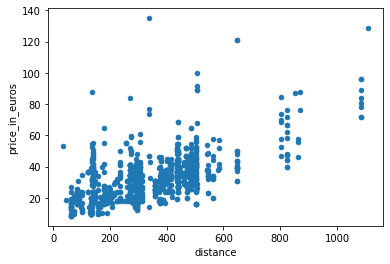

In [32]:
plot = df_tickets[:1000].plot.scatter('distance', 'price_in_euros')
# The relation betweeen the duration and the price is very noisy 
from sklearn.metrics import r2_score 
print("R^2 =", r2_score(df_tickets["distance"].to_numpy(), df_tickets["price_in_euros"].to_numpy())) # No linear relations!

The dataset now contains 32672
We can identify outliers!
R^2 = -82.93818843816602


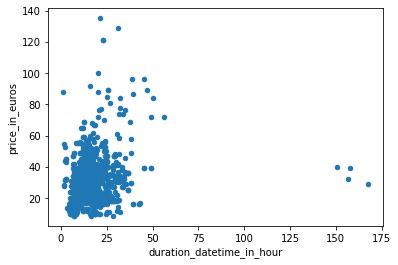

In [33]:
plot = df_tickets[:1000].plot.scatter('duration_datetime_in_hour', 'price_in_euros')
# There seems to be some outliers in our dataset. 
# Let us keep the tickets whose duration of the trip does not exceed 60 hours!
df_tickets = df_tickets[df_tickets["duration_datetime_in_hour"] < 60]
print(f"The dataset now contains {len(df_tickets)}")
# The relation betweeen the duration and the price does not seem very linear either.
print("We can identify outliers!")
print("R^2 =", r2_score(df_tickets["duration_datetime_in_hour"].to_numpy(), df_tickets["price_in_euros"].to_numpy())) # No linear relations!

We could have used some outlier detection methods such as:
- Isolation Forest
- One class SVM
- Local Outlier Factor
<br>to get rid of the outliers in the dataset.

## Features and Target

In [34]:
# Function to create features used to feed our ML model
def get_data_matrix(df):
    return np.column_stack((df.distance
                            , df.duration_datetime_in_min
                            
                            ## data about departure
                            #, df.departure_datetime_month_cos, df.departure_datetime_month_sin
                            #, df.departure_datetime_day_cos, df.departure_datetime_day_sin
                            #, df.departure_datetime_hour_cos, df.departure_datetime_hour_sin
                            
                            ## data about arrival
                            #, df.arrival_datetime_month_cos, df.arrival_datetime_month_sin
                            #, df.arrival_datetime_day_cos, df.arrival_datetime_day_sin
                            #, df.arrival_datetime_hour_cos, df.arrival_datetime_hour_sin 
                           
                            # The target
                            , df.price_in_euros)
            )

# Let us keep 2000 samples for the training
n_samples = 2000
df_tickets = df_tickets.sample(frac = 1) # shuffle the DataFrame rows 
df_tickets_ml = df_tickets.iloc[:n_samples]
data = get_data_matrix(df_tickets_ml)
data_train, data_test = train_test_split(data, test_size=0.25)
#data_test, data_val = train_test_split(data_test, test_size=0.5)
X_train = data_train[:, :-1]
y_train = data_train[:,-1]
X_test = data_test[:, :-1]
y_test = data_test[:,-1]
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (1500, 2)
y_train.shape = (1500,)
X_test.shape = (500, 2)
y_test.shape = (500,)


## Training a model on the training set with different ML models
[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

<br>We will run several ML algorithms and compare their score and duration of execution using the `%%time`
<br>We will start with a linear regression even though the visualisation rejected any linear relations.

### Linear Regression

In [36]:
%%time
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"R^2 = {lin_reg.score(X_train, y_train)}") # R^2
print(f"RMSE = {np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train)))} (over training set)")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))} (over testing set)")
# quite bad with linear regression, as expected.

R^2 = 0.23219114078852243
RMSE = 41.23550527826372 (over training set)
RMSE = 41.05013148043151 (over testing set)
CPU times: user 31.9 ms, sys: 16.5 ms, total: 48.4 ms
Wall time: 85.6 ms


### SVR 

In [37]:
%%time
from sklearn.svm import SVR
param = {'C' : [1,5,10]} # regularization parameter
svr = SVR(kernel='rbf') # a linear kernel will not give relevant results
grids = GridSearchCV(svr,param,cv=5, verbose=1)
grids.fit(X_train, y_train)
print('Best parameters:', grids.best_params_)
print(f"RMSE = {np.sqrt(mean_squared_error(y_train, grids.predict(X_train)))} (over training set)")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, grids.predict(X_test)))} (over testing set)")

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'C': 10}
RMSE = 39.99041671036248 (over training set)
RMSE = 42.61401874953517 (over testing set)
CPU times: user 906 ms, sys: 14.4 ms, total: 921 ms
Wall time: 953 ms


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.9s finished


### Random Forest Regressor

In [38]:
%%time
from sklearn.ensemble import RandomForestRegressor
param = {'bootstrap': [True, False]
         , 'max_features': ['auto', 'sqrt']
        }
rf_reg = RandomForestRegressor(n_estimators=2000)    
grids = GridSearchCV(rf_reg,param, cv=5, verbose=4, n_jobs=-1)
grids.fit(X_train, y_train)
print('Best parameters:', grids.best_params_)
print(f"RMSE = {np.sqrt(mean_squared_error(y_train, grids.predict(X_train)))} (over training set)")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, grids.predict(X_test)))} (over testing set)")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   45.0s finished


Best parameters: {'bootstrap': True, 'max_features': 'sqrt'}
RMSE = 12.688376634777603 (over training set)
RMSE = 29.777015952854878 (over testing set)
CPU times: user 4.5 s, sys: 188 ms, total: 4.68 s
Wall time: 49.7 s


### XGBOOST

In [39]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [40]:
%%time
import xgboost

XGBModel = xgboost.XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)
print(f"RMSE = {np.sqrt(mean_squared_error(y_train, XGBModel.predict(X_train)))} (over training set)")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, XGBModel.predict(X_test)))} (over testing set)")

[19:39:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE = 27.438668458450795 (over training set)
RMSE = 31.155194826675547 (over testing set)
CPU times: user 73.6 ms, sys: 8.73 ms, total: 82.3 ms
Wall time: 94.6 ms


There are 500 prices to predict whose mean=61.67518€ and std=44.58567225653999€.


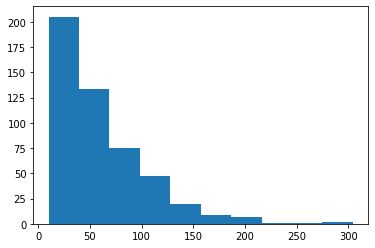

In [41]:
max(y_test)
plt.hist(y_test)
print(f"There are {len(y_test)} prices to predict whose mean={np.mean(y_test)}€ and std={np.std(y_test)}€.")

We found better results when we do not take into account the time datas (departure & arrival) in our feature matrix $X$. If we decide to take the cyclical encoding we performed, the feature matrix would have 14 columns!
<br>The random forest gives the best RMSE: it is nearly half the standard deviation, which is not really good.

Let us try to run a Deep Learning model (with a standard Neural Network model) to take into account the encoding we did and not limit the number of samples in our training set.

## Deep Learning Model

In [42]:
def get_data_matrix(df):
    return np.column_stack((df.distance
                            , df.duration_datetime_in_min
                            
                            ## data about departure
                            , df.departure_datetime_month_cos, df.departure_datetime_month_sin
                            , df.departure_datetime_day_cos, df.departure_datetime_day_sin
                            , df.departure_datetime_hour_cos, df.departure_datetime_hour_sin
                            
                            ## data about arrival
                            , df.arrival_datetime_month_cos, df.arrival_datetime_month_sin
                            , df.arrival_datetime_day_cos, df.arrival_datetime_day_sin
                            , df.arrival_datetime_hour_cos, df.arrival_datetime_hour_sin 
                           
                            ## The target
                            , df.price_in_euros)
            )

data = get_data_matrix(df_tickets)
data_train, data_test = train_test_split(data, test_size=0.25)
X_train = data_train[:, :-1]
y_train = data_train[:,-1]
X_test = data_test[:, :-1]
y_test = data_test[:,-1]
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (24504, 14)
y_train.shape = (24504,)
X_test.shape = (8168, 14)
y_test.shape = (8168,)


In [43]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from keras.optimizers import Adam

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,785
Trainable params: 166,785
Non-trainable params: 0
_________________________________________________________________


In [44]:
NN_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split = 0.25)


Train on 18378 samples, validate on 6126 samples
Epoch 1/200
18378/18378 [==============================] - 2s 91us/step - loss: 26.5474 - mean_absolute_error: 26.5474 - val_loss: 24.6165 - val_mean_absolute_error: 24.6165
Epoch 2/200
18378/18378 [==============================] - 1s 74us/step - loss: 24.9336 - mean_absolute_error: 24.9336 - val_loss: 23.8769 - val_mean_absolute_error: 23.8770
Epoch 3/200
18378/18378 [==============================] - 2s 85us/step - loss: 24.2750 - mean_absolute_error: 24.2750 - val_loss: 24.6661 - val_mean_absolute_error: 24.6661
Epoch 4/200
18378/18378 [==============================] - 2s 86us/step - loss: 24.2043 - mean_absolute_error: 24.2042 - val_loss: 22.7391 - val_mean_absolute_error: 22.7391
Epoch 5/200
18378/18378 [==============================] - 2s 93us/step - loss: 24.0417 - mean_absolute_error: 24.0417 - val_loss: 23.1234 - val_mean_absolute_error: 23.1234
Epoch 6/200
18378/18378 [==============================] - 2s 93us/step - loss: 

18378/18378 [==============================] - 1s 68us/step - loss: 23.0318 - mean_absolute_error: 23.0318 - val_loss: 22.0019 - val_mean_absolute_error: 22.0019
Epoch 47/200
18378/18378 [==============================] - 1s 67us/step - loss: 23.1354 - mean_absolute_error: 23.1354 - val_loss: 22.1169 - val_mean_absolute_error: 22.1169
Epoch 48/200
18378/18378 [==============================] - 1s 70us/step - loss: 23.0200 - mean_absolute_error: 23.0200 - val_loss: 21.9157 - val_mean_absolute_error: 21.9157
Epoch 49/200
18378/18378 [==============================] - 1s 66us/step - loss: 23.0313 - mean_absolute_error: 23.0312 - val_loss: 22.1698 - val_mean_absolute_error: 22.1698
Epoch 50/200
18378/18378 [==============================] - 1s 68us/step - loss: 23.0525 - mean_absolute_error: 23.0525 - val_loss: 21.9927 - val_mean_absolute_error: 21.9927
Epoch 51/200
18378/18378 [==============================] - 1s 69us/step - loss: 23.0094 - mean_absolute_error: 23.0093 - val_loss: 22.065

Epoch 93/200
18378/18378 [==============================] - 1s 67us/step - loss: 22.5956 - mean_absolute_error: 22.5956 - val_loss: 21.8203 - val_mean_absolute_error: 21.8203
Epoch 94/200
18378/18378 [==============================] - 1s 66us/step - loss: 22.5977 - mean_absolute_error: 22.5977 - val_loss: 21.9008 - val_mean_absolute_error: 21.9008
Epoch 95/200
18378/18378 [==============================] - 1s 66us/step - loss: 22.6129 - mean_absolute_error: 22.6129 - val_loss: 21.9168 - val_mean_absolute_error: 21.9168
Epoch 96/200
18378/18378 [==============================] - 1s 67us/step - loss: 22.5683 - mean_absolute_error: 22.5683 - val_loss: 22.2137 - val_mean_absolute_error: 22.2137
Epoch 97/200
18378/18378 [==============================] - 1s 65us/step - loss: 22.5070 - mean_absolute_error: 22.5070 - val_loss: 21.7761 - val_mean_absolute_error: 21.7761
Epoch 98/200
18378/18378 [==============================] - 1s 67us/step - loss: 22.5898 - mean_absolute_error: 22.5898 - val

18378/18378 [==============================] - ETA: 0s - loss: 21.9934 - mean_absolute_error: 21.993 - 2s 84us/step - loss: 22.0337 - mean_absolute_error: 22.0337 - val_loss: 21.5452 - val_mean_absolute_error: 21.5452
Epoch 140/200
18378/18378 [==============================] - 1s 79us/step - loss: 22.0450 - mean_absolute_error: 22.0450 - val_loss: 21.2861 - val_mean_absolute_error: 21.2861
Epoch 141/200
18378/18378 [==============================] - 1s 71us/step - loss: 21.9728 - mean_absolute_error: 21.9728 - val_loss: 21.3682 - val_mean_absolute_error: 21.3682
Epoch 142/200
18378/18378 [==============================] - 1s 81us/step - loss: 21.9757 - mean_absolute_error: 21.9757 - val_loss: 21.4731 - val_mean_absolute_error: 21.4731
Epoch 143/200
18378/18378 [==============================] - 1s 71us/step - loss: 21.9324 - mean_absolute_error: 21.9324 - val_loss: 22.3475 - val_mean_absolute_error: 22.3475
Epoch 144/200
18378/18378 [==============================] - 1s 69us/step - lo

18378/18378 [==============================] - 1s 65us/step - loss: 21.6791 - mean_absolute_error: 21.6791 - val_loss: 21.6684 - val_mean_absolute_error: 21.6684
Epoch 186/200
18378/18378 [==============================] - 1s 64us/step - loss: 21.5889 - mean_absolute_error: 21.5889 - val_loss: 21.4788 - val_mean_absolute_error: 21.4788
Epoch 187/200
18378/18378 [==============================] - 1s 63us/step - loss: 21.6414 - mean_absolute_error: 21.6414 - val_loss: 20.9662 - val_mean_absolute_error: 20.9662
Epoch 188/200
18378/18378 [==============================] - 1s 64us/step - loss: 21.7134 - mean_absolute_error: 21.7134 - val_loss: 21.5615 - val_mean_absolute_error: 21.5615
Epoch 189/200
18378/18378 [==============================] - 1s 63us/step - loss: 21.6147 - mean_absolute_error: 21.6147 - val_loss: 21.1907 - val_mean_absolute_error: 21.1907
Epoch 190/200
18378/18378 [==============================] - 1s 66us/step - loss: 21.7539 - mean_absolute_error: 21.7539 - val_loss: 2

In [45]:
print(f"RMSE = {np.sqrt(mean_squared_error(y_train, NN_model.predict(X_train)))} (over training set)")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, NN_model.predict(X_test)))} (over testing set)")

RMSE = 34.792899658350166 (over training set)
RMSE = 35.14707765946139 (over testing set)


# Final conclusion
To sum up, xgboost and Random Forest obtain a RMSE of roughly 28€ which is eventually better than what we  with a DL model gives: 35€.
<br>Obviously, the models we used needed some more relevant feature such as the transport type to improve the error of the prediction. 
<br>A more detailed analysis about the data to identify outliers is expected as we simply got rid of duration very important.